In [1]:
import numpy as np
from matplotlib import pyplot as plt
import json
import psi4

In [2]:
mol_str = """
Li
H 1 1.8
symmetry c1
"""

options_dict = {
    "basis": "6-311g",
    "scf_type": "pk",
    "e_convergence": 1e-10,
    "d_convergence": 1e-10,
    'num_roots' : 5, 
    'active' : 16,
}

mol = psi4.geometry(mol_str)
psi4.set_options(options_dict)
scf_e, wfn = psi4.energy('SCF', return_wfn=True)
fci_energy, wfn = psi4.energy('fci',ref_wfn=wfn, return_wfn=True)
-8.00343748753214
-8.003437487549196


-7.894557152757274
-7.89455715275803


Scratch directory: /tmp/
   => Libint2 <=

    Primary   basis highest AM E, G, H:  5, 4, 3
    Auxiliary basis highest AM E, G, H:  6, 5, 4
    Onebody   basis highest AM E, G, H:  6, 5, 4
    Solid Harmonics ordering:            gaussian

*** tstart() called on CHEMYY31VALT
*** at Fri Dec 15 11:16:33 2023

   => Loading Basis Set <=

    Name: 6-311G
    Role: ORBITAL
    Keyword: BASIS
    atoms 1 entry LI         line    41 file /Users/jfoley19/Code/psi4/objdir-Release/stage/share/psi4/basis/6-311g.gbs 
    atoms 2 entry H          line    21 file /Users/jfoley19/Code/psi4/objdir-Release/stage/share/psi4/basis/6-311g.gbs 


         ---------------------------------------------------------
                                   SCF
               by Justin Turney, Rob Parrish, Andy Simmonett
                          and Daniel G. A. Smith
                              RHF Reference
                        1 Threads,    500 MiB Core
         -------------------------------------------

-7.89455715275803

grals.
	First half integral transformation complete.
	Starting second half-transformation.
	Two-electron integral transformation complete.

   ==> Starting CI iterations <==

    H0 Block Eigenvalue =  -8.00030003

    Simultaneous Expansion Method (Block Davidson Method)
    Using 5 initial trial vectors

(sem_iter): H0block_->H0b_diag[1][1] - H0block_->H0b_diag[2][1] = 0.616719 - -0.616719 = 1.233439 > 1.0E-8
(sem_iter): H0block_->H0b_diag[3][3] - H0block_->H0b_diag[5][3] = 0.586924 - -0.586924 = 1.173848 > 1.0E-8
(sem_iter): H0block_->H0b_diag[3][4] - H0block_->H0b_diag[5][4] = -0.087869 - 0.087869 = -0.175738 > 1.0E-8
(sem_iter): H0block_->H0b_diag[1][7] - H0block_->H0b_diag[2][7] = -0.126429 - 0.126429 = -0.252859 > 1.0E-8
     Iter   Root       Total Energy       Delta E      C RMS

   @CI  0:     0     -8.000300028112   -8.8823E+00   3.9439E-01  
   @CI  0:     1     -7.892950686007   -8.7749E+00   3.8685E-01  
   @CI  0:     2     -7.856773174791   -8.7387E+00   3.8494E-01  
  

In [3]:
dict = {'repo': {'repository_url': 'https://github.com/mapol-chem/qed-ci', 'branch': 'direct_ci', 'commit': '7f25d1c5fd458a06002e79d610aa17399f213f71'}, 'molecule': {'molecule_name': 'MgH', 'geometry': [], 'symbols': ['Mg', 'H'], 'bond_length': [1.25]}, 'driver': 'energy', 'model': {'method': 'qed-cas', 'orbital_basis': 'cc-pVDZ', 'photon_basis': 'photon_number_basis', 'number_of_photon_states': 0, 'nact_orbs': 10, 'nact_els': 12, 'lambda': [0, 0, 0], 'omega': 0}, 'return_result': [[-199.84574777281213, -199.6670949142944, -199.62808625455398, -199.57617130672267, -199.57617130672236, -199.55530455621442, -199.55530455621357, -199.45881726211363, -199.43159507651913, -199.10130572148347]]}

In [4]:
json_object = json.dumps(dict, indent=4)
with open("test.json", "w") as outfile:
    outfile.write(json_object)

In [3]:
mol_tmpl = """
Li
H 1 **R**
symmetry c1
"""

r_data = np.linspace(1.4, 2.2, 50)

fci_e0 = []
fci_e1 = []
fci_e2 = []
for r in r_data:
    mol_str = mol_tmpl.replace("**R**", str(r))
    mol = psi4.geometry(mol_str)
    scf_e, wfn = psi4.energy('SCF', return_wfn=True)
    fci_energy, wfn = psi4.energy('fci',ref_wfn=wfn, return_wfn=True)
    fci_e0.append(wfn.variable("CI ROOT 0 TOTAL ENERGY"))
    fci_e1.append(wfn.variable("CI ROOT 1 TOTAL ENERGY"))
    fci_e2.append(wfn.variable("CI ROOT 2 TOTAL ENERGY"))
    
    


Scratch directory: /tmp/
   => Libint2 <=

    Primary   basis highest AM E, G, H:  5, 4, 3
    Auxiliary basis highest AM E, G, H:  6, 5, 4
    Onebody   basis highest AM E, G, H:  6, 5, 4
    Solid Harmonics ordering:            gaussian

*** tstart() called on CHEMYY31VALT
*** at Fri Dec 15 11:16:49 2023

   => Loading Basis Set <=

    Name: 6-311G
    Role: ORBITAL
    Keyword: BASIS
    atoms 1 entry LI         line    41 file /Users/jfoley19/Code/psi4/objdir-Release/stage/share/psi4/basis/6-311g.gbs 
    atoms 2 entry H          line    21 file /Users/jfoley19/Code/psi4/objdir-Release/stage/share/psi4/basis/6-311g.gbs 


         ---------------------------------------------------------
                                   SCF
               by Justin Turney, Rob Parrish, Andy Simmonett
                          and Daniel G. A. Smith
                              RHF Reference
                        1 Threads,    500 MiB Core
         -------------------------------------------

      Computing two-electron integrals...done
      Computed 2701 non-zero two-electron integrals.
        Stored in file 33.


         ---------------------------------------------------------
                          Configuration Interaction
                            (a 'D E T C I' module)

                 C. David Sherrill, Daniel G. A. Smith, and
                              Matt L. Leininger
         ---------------------------------------------------------


   ==> Parameters <==

    EX LEVEL       =        4      H0 BLOCKSIZE  =     1000
    VAL EX LEVEL   =        0      H0 GUESS SIZE =     1000
    H0COUPLINGSIZE =        0      H0 COUPLING   =       NO
    MAXITER        =       24      NUM PRINT     =       20
    NUM ROOTS      =        5      ICORE         =        1
    PRINT LVL      =        1      FCI           =      YES
    R CONV         = 1.00e-04      MIXED         =      YES
    E CONV         = 1.00e-10      MIXED4        =      YES
    R4S            = 


Scratch directory: /tmp/
 MINTS: Wrapper to libmints.
   by Justin Turney

   Calculation information:
      Number of threads:                 1
      Number of atoms:                   2
      Number of AO shells:              10
      Number of SO shells:              10
      Number of primitives:             21
      Number of atomic orbitals:        16
      Number of basis functions:        16

      Number of irreps:                  1
      Integral cutoff                 1.00e-12
      Number of functions per irrep: [  16 ]

 OEINTS: Overlap, kinetic, potential, dipole, and quadrupole integrals
         stored in file 35.

      Computing two-electron integrals...done
      Computed 2701 non-zero two-electron integrals.
        Stored in file 33.


         ---------------------------------------------------------
                          Configuration Interaction
                            (a 'D E T C I' module)

                 C. David Sherrill, Daniel G. A. Smith, and

 OEINTS: Overlap, kinetic, potential, dipole, and quadrupole integrals
         stored in file 35.

      Computing two-electron integrals...done
      Computed 2701 non-zero two-electron integrals.
        Stored in file 33.


         ---------------------------------------------------------
                          Configuration Interaction
                            (a 'D E T C I' module)

                 C. David Sherrill, Daniel G. A. Smith, and
                              Matt L. Leininger
         ---------------------------------------------------------


   ==> Parameters <==

    EX LEVEL       =        4      H0 BLOCKSIZE  =     1000
    VAL EX LEVEL   =        0      H0 GUESS SIZE =     1000
    H0COUPLINGSIZE =        0      H0 COUPLING   =       NO
    MAXITER        =       24      NUM PRINT     =       20
    NUM ROOTS      =        5      ICORE         =        1
    PRINT LVL      =        1      FCI           =      YES
    R CONV         = 1.00e-04      MIXED 

	user time   =       0.10 seconds =       0.00 minutes
	system time =       0.01 seconds =       0.00 minutes
	total time  =          0 seconds =       0.00 minutes
Total time:
	user time   =       3.55 seconds =       0.06 minutes
	system time =       0.74 seconds =       0.01 minutes
	total time  =          8 seconds =       0.13 minutes

Scratch directory: /tmp/
 MINTS: Wrapper to libmints.
   by Justin Turney

   Calculation information:
      Number of threads:                 1
      Number of atoms:                   2
      Number of AO shells:              10
      Number of SO shells:              10
      Number of primitives:             21
      Number of atomic orbitals:        16
      Number of basis functions:        16

      Number of irreps:                  1
      Integral cutoff                 1.00e-12
      Number of functions per irrep: [  16 ]

 OEINTS: Overlap, kinetic, potential, dipole, and quadrupole integrals
         stored in file 35.

      Computing 

	user time   =       0.11 seconds =       0.00 minutes
	system time =       0.01 seconds =       0.00 minutes
	total time  =          0 seconds =       0.00 minutes
Total time:
	user time   =       4.20 seconds =       0.07 minutes
	system time =       0.88 seconds =       0.01 minutes
	total time  =          9 seconds =       0.15 minutes

Scratch directory: /tmp/
 MINTS: Wrapper to libmints.
   by Justin Turney

   Calculation information:
      Number of threads:                 1
      Number of atoms:                   2
      Number of AO shells:              10
      Number of SO shells:              10
      Number of primitives:             21
      Number of atomic orbitals:        16
      Number of basis functions:        16

      Number of irreps:                  1
      Integral cutoff                 1.00e-12
      Number of functions per irrep: [  16 ]

 OEINTS: Overlap, kinetic, potential, dipole, and quadrupole integrals
         stored in file 35.

      Computing 

	user time   =       0.11 seconds =       0.00 minutes
	system time =       0.01 seconds =       0.00 minutes
	total time  =          0 seconds =       0.00 minutes
Total time:
	user time   =       4.86 seconds =       0.08 minutes
	system time =       1.02 seconds =       0.02 minutes
	total time  =         10 seconds =       0.17 minutes

Scratch directory: /tmp/
 MINTS: Wrapper to libmints.
   by Justin Turney

   Calculation information:
      Number of threads:                 1
      Number of atoms:                   2
      Number of AO shells:              10
      Number of SO shells:              10
      Number of primitives:             21
      Number of atomic orbitals:        16
      Number of basis functions:        16

      Number of irreps:                  1
      Integral cutoff                 1.00e-12
      Number of functions per irrep: [  16 ]

 OEINTS: Overlap, kinetic, potential, dipole, and quadrupole integrals
         stored in file 35.

      Computing 

      Computing two-electron integrals...done
      Computed 2701 non-zero two-electron integrals.
        Stored in file 33.


         ---------------------------------------------------------
                          Configuration Interaction
                            (a 'D E T C I' module)

                 C. David Sherrill, Daniel G. A. Smith, and
                              Matt L. Leininger
         ---------------------------------------------------------


   ==> Parameters <==

    EX LEVEL       =        4      H0 BLOCKSIZE  =     1000
    VAL EX LEVEL   =        0      H0 GUESS SIZE =     1000
    H0COUPLINGSIZE =        0      H0 COUPLING   =       NO
    MAXITER        =       24      NUM PRINT     =       20
    NUM ROOTS      =        5      ICORE         =        1
    PRINT LVL      =        1      FCI           =      YES
    R CONV         = 1.00e-04      MIXED         =      YES
    E CONV         = 1.00e-10      MIXED4        =      YES
    R4S            = 

	user time   =       0.10 seconds =       0.00 minutes
	system time =       0.01 seconds =       0.00 minutes
	total time  =          0 seconds =       0.00 minutes
Total time:
	user time   =       6.17 seconds =       0.10 minutes
	system time =       1.29 seconds =       0.02 minutes
	total time  =         11 seconds =       0.18 minutes

Scratch directory: /tmp/
 MINTS: Wrapper to libmints.
   by Justin Turney

   Calculation information:
      Number of threads:                 1
      Number of atoms:                   2
      Number of AO shells:              10
      Number of SO shells:              10
      Number of primitives:             21
      Number of atomic orbitals:        16
      Number of basis functions:        16

      Number of irreps:                  1
      Integral cutoff                 1.00e-12
      Number of functions per irrep: [  16 ]

 OEINTS: Overlap, kinetic, potential, dipole, and quadrupole integrals
         stored in file 35.

      Computing 

	user time   =       0.11 seconds =       0.00 minutes
	system time =       0.01 seconds =       0.00 minutes
	total time  =          0 seconds =       0.00 minutes
Total time:
	user time   =       6.83 seconds =       0.11 minutes
	system time =       1.45 seconds =       0.02 minutes
	total time  =         12 seconds =       0.20 minutes

Scratch directory: /tmp/
 MINTS: Wrapper to libmints.
   by Justin Turney

   Calculation information:
      Number of threads:                 1
      Number of atoms:                   2
      Number of AO shells:              10
      Number of SO shells:              10
      Number of primitives:             21
      Number of atomic orbitals:        16
      Number of basis functions:        16

      Number of irreps:                  1
      Integral cutoff                 1.00e-12
      Number of functions per irrep: [  16 ]

 OEINTS: Overlap, kinetic, potential, dipole, and quadrupole integrals
         stored in file 35.

      Computing 

      Computing two-electron integrals...done
      Computed 2701 non-zero two-electron integrals.
        Stored in file 33.


         ---------------------------------------------------------
                          Configuration Interaction
                            (a 'D E T C I' module)

                 C. David Sherrill, Daniel G. A. Smith, and
                              Matt L. Leininger
         ---------------------------------------------------------


   ==> Parameters <==

    EX LEVEL       =        4      H0 BLOCKSIZE  =     1000
    VAL EX LEVEL   =        0      H0 GUESS SIZE =     1000
    H0COUPLINGSIZE =        0      H0 COUPLING   =       NO
    MAXITER        =       24      NUM PRINT     =       20
    NUM ROOTS      =        5      ICORE         =        1
    PRINT LVL      =        1      FCI           =      YES
    R CONV         = 1.00e-04      MIXED         =      YES
    E CONV         = 1.00e-10      MIXED4        =      YES
    R4S            = 

      Computed 2701 non-zero two-electron integrals.
        Stored in file 33.


         ---------------------------------------------------------
                          Configuration Interaction
                            (a 'D E T C I' module)

                 C. David Sherrill, Daniel G. A. Smith, and
                              Matt L. Leininger
         ---------------------------------------------------------


   ==> Parameters <==

    EX LEVEL       =        4      H0 BLOCKSIZE  =     1000
    VAL EX LEVEL   =        0      H0 GUESS SIZE =     1000
    H0COUPLINGSIZE =        0      H0 COUPLING   =       NO
    MAXITER        =       24      NUM PRINT     =       20
    NUM ROOTS      =        5      ICORE         =        1
    PRINT LVL      =        1      FCI           =      YES
    R CONV         = 1.00e-04      MIXED         =      YES
    E CONV         = 1.00e-10      MIXED4        =      YES
    R4S            =       NO      REPL OTF      =       NO
    DIA

	user time   =       0.10 seconds =       0.00 minutes
	system time =       0.01 seconds =       0.00 minutes
	total time  =          0 seconds =       0.00 minutes
Total time:
	user time   =       8.89 seconds =       0.15 minutes
	system time =       1.87 seconds =       0.03 minutes
	total time  =         15 seconds =       0.25 minutes

Scratch directory: /tmp/
 MINTS: Wrapper to libmints.
   by Justin Turney

   Calculation information:
      Number of threads:                 1
      Number of atoms:                   2
      Number of AO shells:              10
      Number of SO shells:              10
      Number of primitives:             21
      Number of atomic orbitals:        16
      Number of basis functions:        16

      Number of irreps:                  1
      Integral cutoff                 1.00e-12
      Number of functions per irrep: [  16 ]

 OEINTS: Overlap, kinetic, potential, dipole, and quadrupole integrals
         stored in file 35.

      Computing 

                              Matt L. Leininger
         ---------------------------------------------------------


   ==> Parameters <==

    EX LEVEL       =        4      H0 BLOCKSIZE  =     1000
    VAL EX LEVEL   =        0      H0 GUESS SIZE =     1000
    H0COUPLINGSIZE =        0      H0 COUPLING   =       NO
    MAXITER        =       24      NUM PRINT     =       20
    NUM ROOTS      =        5      ICORE         =        1
    PRINT LVL      =        1      FCI           =      YES
    R CONV         = 1.00e-04      MIXED         =      YES
    E CONV         = 1.00e-10      MIXED4        =      YES
    R4S            =       NO      REPL OTF      =       NO
    DIAG METHOD    =      SEM      FOLLOW ROOT   =        0
    PRECONDITIONER = DAVIDSON      UPDATE        = DAVIDSON
    S              =   0.0000      Ms0           =      YES
    GUESS VECTOR   =  H0BLOCK      OPENTYPE      =     NONE
    COLLAPSE SIZE  =        1      HD AVG        = EVANGELISTI
    MAX NUM VECS 

	user time   =      10.24 seconds =       0.17 minutes
	system time =       2.16 seconds =       0.04 minutes
	total time  =         16 seconds =       0.27 minutes

Scratch directory: /tmp/
 MINTS: Wrapper to libmints.
   by Justin Turney

   Calculation information:
      Number of threads:                 1
      Number of atoms:                   2
      Number of AO shells:              10
      Number of SO shells:              10
      Number of primitives:             21
      Number of atomic orbitals:        16
      Number of basis functions:        16

      Number of irreps:                  1
      Integral cutoff                 1.00e-12
      Number of functions per irrep: [  16 ]

 OEINTS: Overlap, kinetic, potential, dipole, and quadrupole integrals
         stored in file 35.

      Computing two-electron integrals...done
      Computed 2701 non-zero two-electron integrals.
        Stored in file 33.


         --------------------------------------------------------

   @RHF iter   8:    -7.98447460082570   -1.12177e-12   5.69936e-09 DIIS
   @RHF iter   9:    -7.98447460082572   -2.22045e-14   6.53839e-10 DIIS
   @RHF iter  10:    -7.98447460082572    0.00000e+00   8.70570e-11 DIIS
  Energy and wave function converged.


  ==> Post-Iterations <==

    Orbital Energies [Eh]
    ---------------------

    Doubly Occupied:                                                      

       1A     -2.454267     2A     -0.299411  

    Virtual:                                                              

       3A     -0.001844     4A      0.041480     5A      0.041480  
       6A      0.091093     7A      0.115148     8A      0.149988  
       9A      0.149988    10A      0.228703    11A      0.519895  
      12A      0.581543    13A      0.581543    14A      0.679487  
      15A      2.830326    16A      3.971092  

    Final Occupation by Irrep:
              A 
    DOCC [     2 ]

  @RHF Final Energy:    -7.98447460082572

   => Energetics <=

    Nucle

      Computing two-electron integrals...done
      Computed 2701 non-zero two-electron integrals.
        Stored in file 33.


         ---------------------------------------------------------
                          Configuration Interaction
                            (a 'D E T C I' module)

                 C. David Sherrill, Daniel G. A. Smith, and
                              Matt L. Leininger
         ---------------------------------------------------------


   ==> Parameters <==

    EX LEVEL       =        4      H0 BLOCKSIZE  =     1000
    VAL EX LEVEL   =        0      H0 GUESS SIZE =     1000
    H0COUPLINGSIZE =        0      H0 COUPLING   =       NO
    MAXITER        =       24      NUM PRINT     =       20
    NUM ROOTS      =        5      ICORE         =        1
    PRINT LVL      =        1      FCI           =      YES
    R CONV         = 1.00e-04      MIXED         =      YES
    E CONV         = 1.00e-10      MIXED4        =      YES
    R4S            = 

	user time   =      12.18 seconds =       0.20 minutes
	system time =       2.61 seconds =       0.04 minutes
	total time  =         19 seconds =       0.32 minutes

Scratch directory: /tmp/
 MINTS: Wrapper to libmints.
   by Justin Turney

   Calculation information:
      Number of threads:                 1
      Number of atoms:                   2
      Number of AO shells:              10
      Number of SO shells:              10
      Number of primitives:             21
      Number of atomic orbitals:        16
      Number of basis functions:        16

      Number of irreps:                  1
      Integral cutoff                 1.00e-12
      Number of functions per irrep: [  16 ]

 OEINTS: Overlap, kinetic, potential, dipole, and quadrupole integrals
         stored in file 35.

      Computing two-electron integrals...done
      Computed 2701 non-zero two-electron integrals.
        Stored in file 33.


         --------------------------------------------------------


Scratch directory: /tmp/
 MINTS: Wrapper to libmints.
   by Justin Turney

   Calculation information:
      Number of threads:                 1
      Number of atoms:                   2
      Number of AO shells:              10
      Number of SO shells:              10
      Number of primitives:             21
      Number of atomic orbitals:        16
      Number of basis functions:        16

      Number of irreps:                  1
      Integral cutoff                 1.00e-12
      Number of functions per irrep: [  16 ]

 OEINTS: Overlap, kinetic, potential, dipole, and quadrupole integrals
         stored in file 35.

      Computing two-electron integrals...done
      Computed 2701 non-zero two-electron integrals.
        Stored in file 33.


         ---------------------------------------------------------
                          Configuration Interaction
                            (a 'D E T C I' module)

                 C. David Sherrill, Daniel G. A. Smith, and

      Computing two-electron integrals...done
      Computed 2701 non-zero two-electron integrals.
        Stored in file 33.


         ---------------------------------------------------------
                          Configuration Interaction
                            (a 'D E T C I' module)

                 C. David Sherrill, Daniel G. A. Smith, and
                              Matt L. Leininger
         ---------------------------------------------------------


   ==> Parameters <==

    EX LEVEL       =        4      H0 BLOCKSIZE  =     1000
    VAL EX LEVEL   =        0      H0 GUESS SIZE =     1000
    H0COUPLINGSIZE =        0      H0 COUPLING   =       NO
    MAXITER        =       24      NUM PRINT     =       20
    NUM ROOTS      =        5      ICORE         =        1
    PRINT LVL      =        1      FCI           =      YES
    R CONV         = 1.00e-04      MIXED         =      YES
    E CONV         = 1.00e-10      MIXED4        =      YES
    R4S            = 

	user time   =       0.11 seconds =       0.00 minutes
	system time =       0.01 seconds =       0.00 minutes
	total time  =          0 seconds =       0.00 minutes
Total time:
	user time   =      14.17 seconds =       0.24 minutes
	system time =       3.04 seconds =       0.05 minutes
	total time  =         21 seconds =       0.35 minutes

Scratch directory: /tmp/
 MINTS: Wrapper to libmints.
   by Justin Turney

   Calculation information:
      Number of threads:                 1
      Number of atoms:                   2
      Number of AO shells:              10
      Number of SO shells:              10
      Number of primitives:             21
      Number of atomic orbitals:        16
      Number of basis functions:        16

      Number of irreps:                  1
      Integral cutoff                 1.00e-12
      Number of functions per irrep: [  16 ]

 OEINTS: Overlap, kinetic, potential, dipole, and quadrupole integrals
         stored in file 35.

      Computing 


*** tstop() called on Jessicas-iMac.local at Sun Oct 22 16:13:57 2023
Module time:
	user time   =       0.10 seconds =       0.00 minutes
	system time =       0.01 seconds =       0.00 minutes
	total time  =          0 seconds =       0.00 minutes
Total time:
	user time   =      14.81 seconds =       0.25 minutes
	system time =       3.16 seconds =       0.05 minutes
	total time  =         22 seconds =       0.37 minutes

Scratch directory: /tmp/
 MINTS: Wrapper to libmints.
   by Justin Turney

   Calculation information:
      Number of threads:                 1
      Number of atoms:                   2
      Number of AO shells:              10
      Number of SO shells:              10
      Number of primitives:             21
      Number of atomic orbitals:        16
      Number of basis functions:        16

      Number of irreps:                  1
      Integral cutoff                 1.00e-12
      Number of functions per irrep: [  16 ]

 OEINTS: Overlap, kinetic, poten


*** tstop() called on Jessicas-iMac.local at Sun Oct 22 16:13:58 2023
Module time:
	user time   =       0.10 seconds =       0.00 minutes
	system time =       0.01 seconds =       0.00 minutes
	total time  =          0 seconds =       0.00 minutes
Total time:
	user time   =      15.51 seconds =       0.26 minutes
	system time =       3.29 seconds =       0.05 minutes
	total time  =         23 seconds =       0.38 minutes

Scratch directory: /tmp/
 MINTS: Wrapper to libmints.
   by Justin Turney

   Calculation information:
      Number of threads:                 1
      Number of atoms:                   2
      Number of AO shells:              10
      Number of SO shells:              10
      Number of primitives:             21
      Number of atomic orbitals:        16
      Number of basis functions:        16

      Number of irreps:                  1
      Integral cutoff                 1.00e-12
      Number of functions per irrep: [  16 ]

 OEINTS: Overlap, kinetic, poten

	system time =       0.01 seconds =       0.00 minutes
	total time  =          0 seconds =       0.00 minutes
Total time:
	user time   =      16.18 seconds =       0.27 minutes
	system time =       3.43 seconds =       0.06 minutes
	total time  =         24 seconds =       0.40 minutes

Scratch directory: /tmp/
 MINTS: Wrapper to libmints.
   by Justin Turney

   Calculation information:
      Number of threads:                 1
      Number of atoms:                   2
      Number of AO shells:              10
      Number of SO shells:              10
      Number of primitives:             21
      Number of atomic orbitals:        16
      Number of basis functions:        16

      Number of irreps:                  1
      Integral cutoff                 1.00e-12
      Number of functions per irrep: [  16 ]

 OEINTS: Overlap, kinetic, potential, dipole, and quadrupole integrals
         stored in file 35.

      Computing two-electron integrals...done
      Computed 2701 non-z

	user time   =       0.10 seconds =       0.00 minutes
	system time =       0.01 seconds =       0.00 minutes
	total time  =          1 seconds =       0.02 minutes
Total time:
	user time   =      16.87 seconds =       0.28 minutes
	system time =       3.56 seconds =       0.06 minutes
	total time  =         25 seconds =       0.42 minutes

Scratch directory: /tmp/
 MINTS: Wrapper to libmints.
   by Justin Turney

   Calculation information:
      Number of threads:                 1
      Number of atoms:                   2
      Number of AO shells:              10
      Number of SO shells:              10
      Number of primitives:             21
      Number of atomic orbitals:        16
      Number of basis functions:        16

      Number of irreps:                  1
      Integral cutoff                 1.00e-12
      Number of functions per irrep: [  16 ]

 OEINTS: Overlap, kinetic, potential, dipole, and quadrupole integrals
         stored in file 35.

      Computing 

	user time   =       0.11 seconds =       0.00 minutes
	system time =       0.01 seconds =       0.00 minutes
	total time  =          0 seconds =       0.00 minutes
Total time:
	user time   =      17.52 seconds =       0.29 minutes
	system time =       3.72 seconds =       0.06 minutes
	total time  =         25 seconds =       0.42 minutes

Scratch directory: /tmp/
 MINTS: Wrapper to libmints.
   by Justin Turney

   Calculation information:
      Number of threads:                 1
      Number of atoms:                   2
      Number of AO shells:              10
      Number of SO shells:              10
      Number of primitives:             21
      Number of atomic orbitals:        16
      Number of basis functions:        16

      Number of irreps:                  1
      Integral cutoff                 1.00e-12
      Number of functions per irrep: [  16 ]

 OEINTS: Overlap, kinetic, potential, dipole, and quadrupole integrals
         stored in file 35.

      Computing 

	user time   =       0.10 seconds =       0.00 minutes
	system time =       0.01 seconds =       0.00 minutes
	total time  =          0 seconds =       0.00 minutes
Total time:
	user time   =      18.18 seconds =       0.30 minutes
	system time =       3.86 seconds =       0.06 minutes
	total time  =         26 seconds =       0.43 minutes

Scratch directory: /tmp/
 MINTS: Wrapper to libmints.
   by Justin Turney

   Calculation information:
      Number of threads:                 1
      Number of atoms:                   2
      Number of AO shells:              10
      Number of SO shells:              10
      Number of primitives:             21
      Number of atomic orbitals:        16
      Number of basis functions:        16

      Number of irreps:                  1
      Integral cutoff                 1.00e-12
      Number of functions per irrep: [  16 ]

 OEINTS: Overlap, kinetic, potential, dipole, and quadrupole integrals
         stored in file 35.

      Computing 

   => Energetics <=

    Nuclear Repulsion Energy =              0.8624063189411308
    One-Electron Energy =                 -12.1625891563459767
    Two-Electron Energy =                   3.3207529781348701
    Total Energy =                         -7.9794298592699757

Computation Completed


Properties will be evaluated at   0.000000,   0.000000,   0.000000 [a0]

Properties computed using the SCF density matrix

  Nuclear Dipole Moment: [e a0]
     X:     0.0000      Y:     0.0000      Z:     1.7309

  Electronic Dipole Moment: [e a0]
     X:     0.0000      Y:     0.0000      Z:    -4.3383

  Dipole Moment: [e a0]
     X:     0.0000      Y:     0.0000      Z:    -2.6074     Total:     2.6074

  Dipole Moment: [D]
     X:     0.0000      Y:     0.0000      Z:    -6.6273     Total:     6.6273


*** tstop() called on Jessicas-iMac.local at Sun Oct 22 16:14:02 2023
Module time:
	user time   =       0.10 seconds =       0.00 minutes
	system time =       0.01 seconds =       0.00 minut

    R4S            =       NO      REPL OTF      =       NO
    DIAG METHOD    =      SEM      FOLLOW ROOT   =        0
    PRECONDITIONER = DAVIDSON      UPDATE        = DAVIDSON
    S              =   0.0000      Ms0           =      YES
    GUESS VECTOR   =  H0BLOCK      OPENTYPE      =     NONE
    COLLAPSE SIZE  =        1      HD AVG        = EVANGELISTI
    MAX NUM VECS   =      125      REF SYM       =     AUTO
    IOPEN        =       NO

    EX ALLOW       =  1  1  1  1 
    STATE AVERAGE  =  0(1.00) 

   ==> CI Orbital and Space information <==

   ------------------------------------
               Space    Total     A
   ------------------------------------
                 Nso       16    16
                 Nmo       16    16
               Ndocc        2     2
               Nsocc        0     0
   ------------------------------------
              CI Spaces
   ------------------------------------
        Dropped DOCC        0     0
              Active       16    16
 

      Computing two-electron integrals...done
      Computed 2701 non-zero two-electron integrals.
        Stored in file 33.


         ---------------------------------------------------------
                          Configuration Interaction
                            (a 'D E T C I' module)

                 C. David Sherrill, Daniel G. A. Smith, and
                              Matt L. Leininger
         ---------------------------------------------------------


   ==> Parameters <==

    EX LEVEL       =        4      H0 BLOCKSIZE  =     1000
    VAL EX LEVEL   =        0      H0 GUESS SIZE =     1000
    H0COUPLINGSIZE =        0      H0 COUPLING   =       NO
    MAXITER        =       24      NUM PRINT     =       20
    NUM ROOTS      =        5      ICORE         =        1
    PRINT LVL      =        1      FCI           =      YES
    R CONV         = 1.00e-04      MIXED         =      YES
    E CONV         = 1.00e-10      MIXED4        =      YES
    R4S            = 

	user time   =       0.10 seconds =       0.00 minutes
	system time =       0.01 seconds =       0.00 minutes
	total time  =          0 seconds =       0.00 minutes
Total time:
	user time   =      20.69 seconds =       0.34 minutes
	system time =       4.44 seconds =       0.07 minutes
	total time  =         29 seconds =       0.48 minutes

Scratch directory: /tmp/
 MINTS: Wrapper to libmints.
   by Justin Turney

   Calculation information:
      Number of threads:                 1
      Number of atoms:                   2
      Number of AO shells:              10
      Number of SO shells:              10
      Number of primitives:             21
      Number of atomic orbitals:        16
      Number of basis functions:        16

      Number of irreps:                  1
      Integral cutoff                 1.00e-12
      Number of functions per irrep: [  16 ]

 OEINTS: Overlap, kinetic, potential, dipole, and quadrupole integrals
         stored in file 35.

      Computing 


*** tstop() called on Jessicas-iMac.local at Sun Oct 22 16:14:05 2023
Module time:
	user time   =       0.10 seconds =       0.00 minutes
	system time =       0.01 seconds =       0.00 minutes
	total time  =          0 seconds =       0.00 minutes
Total time:
	user time   =      21.34 seconds =       0.36 minutes
	system time =       4.59 seconds =       0.08 minutes
	total time  =         30 seconds =       0.50 minutes

Scratch directory: /tmp/
 MINTS: Wrapper to libmints.
   by Justin Turney

   Calculation information:
      Number of threads:                 1
      Number of atoms:                   2
      Number of AO shells:              10
      Number of SO shells:              10
      Number of primitives:             21
      Number of atomic orbitals:        16
      Number of basis functions:        16

      Number of irreps:                  1
      Integral cutoff                 1.00e-12
      Number of functions per irrep: [  16 ]

 OEINTS: Overlap, kinetic, poten

      Computing two-electron integrals...done
      Computed 2701 non-zero two-electron integrals.
        Stored in file 33.


         ---------------------------------------------------------
                          Configuration Interaction
                            (a 'D E T C I' module)

                 C. David Sherrill, Daniel G. A. Smith, and
                              Matt L. Leininger
         ---------------------------------------------------------


   ==> Parameters <==

    EX LEVEL       =        4      H0 BLOCKSIZE  =     1000
    VAL EX LEVEL   =        0      H0 GUESS SIZE =     1000
    H0COUPLINGSIZE =        0      H0 COUPLING   =       NO
    MAXITER        =       24      NUM PRINT     =       20
    NUM ROOTS      =        5      ICORE         =        1
    PRINT LVL      =        1      FCI           =      YES
    R CONV         = 1.00e-04      MIXED         =      YES
    E CONV         = 1.00e-10      MIXED4        =      YES
    R4S            = 


         ---------------------------------------------------------
                          Configuration Interaction
                            (a 'D E T C I' module)

                 C. David Sherrill, Daniel G. A. Smith, and
                              Matt L. Leininger
         ---------------------------------------------------------


   ==> Parameters <==

    EX LEVEL       =        4      H0 BLOCKSIZE  =     1000
    VAL EX LEVEL   =        0      H0 GUESS SIZE =     1000
    H0COUPLINGSIZE =        0      H0 COUPLING   =       NO
    MAXITER        =       24      NUM PRINT     =       20
    NUM ROOTS      =        5      ICORE         =        1
    PRINT LVL      =        1      FCI           =      YES
    R CONV         = 1.00e-04      MIXED         =      YES
    E CONV         = 1.00e-10      MIXED4        =      YES
    R4S            =       NO      REPL OTF      =       NO
    DIAG METHOD    =      SEM      FOLLOW ROOT   =        0
    PRECONDITIONER = DAVIDSO

	user time   =       0.10 seconds =       0.00 minutes
	system time =       0.01 seconds =       0.00 minutes
	total time  =          0 seconds =       0.00 minutes
Total time:
	user time   =      23.28 seconds =       0.39 minutes
	system time =       5.02 seconds =       0.08 minutes
	total time  =         32 seconds =       0.53 minutes

Scratch directory: /tmp/
 MINTS: Wrapper to libmints.
   by Justin Turney

   Calculation information:
      Number of threads:                 1
      Number of atoms:                   2
      Number of AO shells:              10
      Number of SO shells:              10
      Number of primitives:             21
      Number of atomic orbitals:        16
      Number of basis functions:        16

      Number of irreps:                  1
      Integral cutoff                 1.00e-12
      Number of functions per irrep: [  16 ]

 OEINTS: Overlap, kinetic, potential, dipole, and quadrupole integrals
         stored in file 35.

      Computing 


Scratch directory: /tmp/
 MINTS: Wrapper to libmints.
   by Justin Turney

   Calculation information:
      Number of threads:                 1
      Number of atoms:                   2
      Number of AO shells:              10
      Number of SO shells:              10
      Number of primitives:             21
      Number of atomic orbitals:        16
      Number of basis functions:        16

      Number of irreps:                  1
      Integral cutoff                 1.00e-12
      Number of functions per irrep: [  16 ]

 OEINTS: Overlap, kinetic, potential, dipole, and quadrupole integrals
         stored in file 35.

      Computing two-electron integrals...done
      Computed 2701 non-zero two-electron integrals.
        Stored in file 33.


         ---------------------------------------------------------
                          Configuration Interaction
                            (a 'D E T C I' module)

                 C. David Sherrill, Daniel G. A. Smith, and

	user time   =       0.10 seconds =       0.00 minutes
	system time =       0.00 seconds =       0.00 minutes
	total time  =          0 seconds =       0.00 minutes
Total time:
	user time   =      24.58 seconds =       0.41 minutes
	system time =       5.28 seconds =       0.09 minutes
	total time  =         34 seconds =       0.57 minutes

Scratch directory: /tmp/
 MINTS: Wrapper to libmints.
   by Justin Turney

   Calculation information:
      Number of threads:                 1
      Number of atoms:                   2
      Number of AO shells:              10
      Number of SO shells:              10
      Number of primitives:             21
      Number of atomic orbitals:        16
      Number of basis functions:        16

      Number of irreps:                  1
      Integral cutoff                 1.00e-12
      Number of functions per irrep: [  16 ]

 OEINTS: Overlap, kinetic, potential, dipole, and quadrupole integrals
         stored in file 35.

      Computing 

      Computing two-electron integrals...done
      Computed 2701 non-zero two-electron integrals.
        Stored in file 33.


         ---------------------------------------------------------
                          Configuration Interaction
                            (a 'D E T C I' module)

                 C. David Sherrill, Daniel G. A. Smith, and
                              Matt L. Leininger
         ---------------------------------------------------------


   ==> Parameters <==

    EX LEVEL       =        4      H0 BLOCKSIZE  =     1000
    VAL EX LEVEL   =        0      H0 GUESS SIZE =     1000
    H0COUPLINGSIZE =        0      H0 COUPLING   =       NO
    MAXITER        =       24      NUM PRINT     =       20
    NUM ROOTS      =        5      ICORE         =        1
    PRINT LVL      =        1      FCI           =      YES
    R CONV         = 1.00e-04      MIXED         =      YES
    E CONV         = 1.00e-10      MIXED4        =      YES
    R4S            = 

   => Energetics <=

    Nuclear Repulsion Energy =              0.7857479794796969
    One-Electron Energy =                 -11.9801955940138640
    Two-Electron Energy =                   3.2233641795950585
    Total Energy =                         -7.9710834349391089

Computation Completed


Properties will be evaluated at   0.000000,   0.000000,   0.000000 [a0]

Properties computed using the SCF density matrix

  Nuclear Dipole Moment: [e a0]
     X:     0.0000      Y:     0.0000      Z:     1.8998

  Electronic Dipole Moment: [e a0]
     X:    -0.0000      Y:     0.0000      Z:    -4.6972

  Dipole Moment: [e a0]
     X:    -0.0000      Y:     0.0000      Z:    -2.7974     Total:     2.7974

  Dipole Moment: [D]
     X:    -0.0000      Y:     0.0000      Z:    -7.1103     Total:     7.1103


*** tstop() called on Jessicas-iMac.local at Sun Oct 22 16:14:11 2023
Module time:
	user time   =       0.10 seconds =       0.00 minutes
	system time =       0.01 seconds =       0.00 minut

      Computing two-electron integrals...done
      Computed 2701 non-zero two-electron integrals.
        Stored in file 33.


         ---------------------------------------------------------
                          Configuration Interaction
                            (a 'D E T C I' module)

                 C. David Sherrill, Daniel G. A. Smith, and
                              Matt L. Leininger
         ---------------------------------------------------------


   ==> Parameters <==

    EX LEVEL       =        4      H0 BLOCKSIZE  =     1000
    VAL EX LEVEL   =        0      H0 GUESS SIZE =     1000
    H0COUPLINGSIZE =        0      H0 COUPLING   =       NO
    MAXITER        =       24      NUM PRINT     =       20
    NUM ROOTS      =        5      ICORE         =        1
    PRINT LVL      =        1      FCI           =      YES
    R CONV         = 1.00e-04      MIXED         =      YES
    E CONV         = 1.00e-10      MIXED4        =      YES
    R4S            = 

	user time   =       0.11 seconds =       0.00 minutes
	system time =       0.01 seconds =       0.00 minutes
	total time  =          0 seconds =       0.00 minutes
Total time:
	user time   =      27.28 seconds =       0.45 minutes
	system time =       5.83 seconds =       0.10 minutes
	total time  =         37 seconds =       0.62 minutes

Scratch directory: /tmp/
 MINTS: Wrapper to libmints.
   by Justin Turney

   Calculation information:
      Number of threads:                 1
      Number of atoms:                   2
      Number of AO shells:              10
      Number of SO shells:              10
      Number of primitives:             21
      Number of atomic orbitals:        16
      Number of basis functions:        16

      Number of irreps:                  1
      Integral cutoff                 1.00e-12
      Number of functions per irrep: [  16 ]

 OEINTS: Overlap, kinetic, potential, dipole, and quadrupole integrals
         stored in file 35.

      Computing 

    E CONV         = 1.00e-10      MIXED4        =      YES
    R4S            =       NO      REPL OTF      =       NO
    DIAG METHOD    =      SEM      FOLLOW ROOT   =        0
    PRECONDITIONER = DAVIDSON      UPDATE        = DAVIDSON
    S              =   0.0000      Ms0           =      YES
    GUESS VECTOR   =  H0BLOCK      OPENTYPE      =     NONE
    COLLAPSE SIZE  =        1      HD AVG        = EVANGELISTI
    MAX NUM VECS   =      125      REF SYM       =     AUTO
    IOPEN        =       NO

    EX ALLOW       =  1  1  1  1 
    STATE AVERAGE  =  0(1.00) 

   ==> CI Orbital and Space information <==

   ------------------------------------
               Space    Total     A
   ------------------------------------
                 Nso       16    16
                 Nmo       16    16
               Ndocc        2     2
               Nsocc        0     0
   ------------------------------------
              CI Spaces
   ------------------------------------
        Dropp

	total time  =          0 seconds =       0.00 minutes
Total time:
	user time   =      28.59 seconds =       0.48 minutes
	system time =       6.12 seconds =       0.10 minutes
	total time  =         39 seconds =       0.65 minutes

Scratch directory: /tmp/
 MINTS: Wrapper to libmints.
   by Justin Turney

   Calculation information:
      Number of threads:                 1
      Number of atoms:                   2
      Number of AO shells:              10
      Number of SO shells:              10
      Number of primitives:             21
      Number of atomic orbitals:        16
      Number of basis functions:        16

      Number of irreps:                  1
      Integral cutoff                 1.00e-12
      Number of functions per irrep: [  16 ]

 OEINTS: Overlap, kinetic, potential, dipole, and quadrupole integrals
         stored in file 35.

      Computing two-electron integrals...done
      Computed 2701 non-zero two-electron integrals.
        Stored in file 33.


	user time   =       0.10 seconds =       0.00 minutes
	system time =       0.00 seconds =       0.00 minutes
	total time  =          0 seconds =       0.00 minutes
Total time:
	user time   =      29.23 seconds =       0.49 minutes
	system time =       6.25 seconds =       0.10 minutes
	total time  =         40 seconds =       0.67 minutes

Scratch directory: /tmp/
 MINTS: Wrapper to libmints.
   by Justin Turney

   Calculation information:
      Number of threads:                 1
      Number of atoms:                   2
      Number of AO shells:              10
      Number of SO shells:              10
      Number of primitives:             21
      Number of atomic orbitals:        16
      Number of basis functions:        16

      Number of irreps:                  1
      Integral cutoff                 1.00e-12
      Number of functions per irrep: [  16 ]

 OEINTS: Overlap, kinetic, potential, dipole, and quadrupole integrals
         stored in file 35.

      Computing 

	total time  =          0 seconds =       0.00 minutes
Total time:
	user time   =      29.92 seconds =       0.50 minutes
	system time =       6.41 seconds =       0.11 minutes
	total time  =         40 seconds =       0.67 minutes

Scratch directory: /tmp/
 MINTS: Wrapper to libmints.
   by Justin Turney

   Calculation information:
      Number of threads:                 1
      Number of atoms:                   2
      Number of AO shells:              10
      Number of SO shells:              10
      Number of primitives:             21
      Number of atomic orbitals:        16
      Number of basis functions:        16

      Number of irreps:                  1
      Integral cutoff                 1.00e-12
      Number of functions per irrep: [  16 ]

 OEINTS: Overlap, kinetic, potential, dipole, and quadrupole integrals
         stored in file 35.

      Computing two-electron integrals...done
      Computed 2701 non-zero two-electron integrals.
        Stored in file 33.



*** tstop() called on Jessicas-iMac.local at Sun Oct 22 16:14:16 2023
Module time:
	user time   =       0.10 seconds =       0.00 minutes
	system time =       0.01 seconds =       0.00 minutes
	total time  =          0 seconds =       0.00 minutes
Total time:
	user time   =      30.56 seconds =       0.51 minutes
	system time =       6.57 seconds =       0.11 minutes
	total time  =         41 seconds =       0.68 minutes

Scratch directory: /tmp/
 MINTS: Wrapper to libmints.
   by Justin Turney

   Calculation information:
      Number of threads:                 1
      Number of atoms:                   2
      Number of AO shells:              10
      Number of SO shells:              10
      Number of primitives:             21
      Number of atomic orbitals:        16
      Number of basis functions:        16

      Number of irreps:                  1
      Integral cutoff                 1.00e-12
      Number of functions per irrep: [  16 ]

 OEINTS: Overlap, kinetic, poten

	user time   =       0.11 seconds =       0.00 minutes
	system time =       0.00 seconds =       0.00 minutes
	total time  =          0 seconds =       0.00 minutes
Total time:
	user time   =      31.25 seconds =       0.52 minutes
	system time =       6.71 seconds =       0.11 minutes
	total time  =         42 seconds =       0.70 minutes

Scratch directory: /tmp/
 MINTS: Wrapper to libmints.
   by Justin Turney

   Calculation information:
      Number of threads:                 1
      Number of atoms:                   2
      Number of AO shells:              10
      Number of SO shells:              10
      Number of primitives:             21
      Number of atomic orbitals:        16
      Number of basis functions:        16

      Number of irreps:                  1
      Integral cutoff                 1.00e-12
      Number of functions per irrep: [  16 ]

 OEINTS: Overlap, kinetic, potential, dipole, and quadrupole integrals
         stored in file 35.

      Computing 


         ---------------------------------------------------------
                          Configuration Interaction
                            (a 'D E T C I' module)

                 C. David Sherrill, Daniel G. A. Smith, and
                              Matt L. Leininger
         ---------------------------------------------------------


   ==> Parameters <==

    EX LEVEL       =        4      H0 BLOCKSIZE  =     1000
    VAL EX LEVEL   =        0      H0 GUESS SIZE =     1000
    H0COUPLINGSIZE =        0      H0 COUPLING   =       NO
    MAXITER        =       24      NUM PRINT     =       20
    NUM ROOTS      =        5      ICORE         =        1
    PRINT LVL      =        1      FCI           =      YES
    R CONV         = 1.00e-04      MIXED         =      YES
    E CONV         = 1.00e-10      MIXED4        =      YES
    R4S            =       NO      REPL OTF      =       NO
    DIAG METHOD    =      SEM      FOLLOW ROOT   =        0
    PRECONDITIONER = DAVIDSO

      Computing two-electron integrals...done
      Computed 2701 non-zero two-electron integrals.
        Stored in file 33.


         ---------------------------------------------------------
                          Configuration Interaction
                            (a 'D E T C I' module)

                 C. David Sherrill, Daniel G. A. Smith, and
                              Matt L. Leininger
         ---------------------------------------------------------


   ==> Parameters <==

    EX LEVEL       =        4      H0 BLOCKSIZE  =     1000
    VAL EX LEVEL   =        0      H0 GUESS SIZE =     1000
    H0COUPLINGSIZE =        0      H0 COUPLING   =       NO
    MAXITER        =       24      NUM PRINT     =       20
    NUM ROOTS      =        5      ICORE         =        1
    PRINT LVL      =        1      FCI           =      YES
    R CONV         = 1.00e-04      MIXED         =      YES
    E CONV         = 1.00e-10      MIXED4        =      YES
    R4S            = 

	user time   =       0.11 seconds =       0.00 minutes
	system time =       0.01 seconds =       0.00 minutes
	total time  =          1 seconds =       0.02 minutes
Total time:
	user time   =      33.26 seconds =       0.55 minutes
	system time =       7.14 seconds =       0.12 minutes
	total time  =         45 seconds =       0.75 minutes

Scratch directory: /tmp/
 MINTS: Wrapper to libmints.
   by Justin Turney

   Calculation information:
      Number of threads:                 1
      Number of atoms:                   2
      Number of AO shells:              10
      Number of SO shells:              10
      Number of primitives:             21
      Number of atomic orbitals:        16
      Number of basis functions:        16

      Number of irreps:                  1
      Integral cutoff                 1.00e-12
      Number of functions per irrep: [  16 ]

 OEINTS: Overlap, kinetic, potential, dipole, and quadrupole integrals
         stored in file 35.

      Computing 

    *  17   -0.070867  (   78,    3)  1AX 4AB 14AA 
    *  18   -0.070867  (    3,   78)  1AX 4AA 14AB 
    *  19   -0.068164  (   10,    3)  1AX 4AB 6AA 
    *  20   -0.068164  (    3,   10)  1AX 4AA 6AB 


   ==> FCI root 3 information <==

    FCI Root 3 energy =    -7.876920438334631

   The 20 most important determinants:

    *   1    0.491945  (    3,    0)  1AX 2AB 4AA 
    *   2    0.491945  (    0,    3)  1AX 2AA 4AB 
    *   3   -0.347260  (    0,    6)  1AX 2AA 5AB 
    *   4   -0.347260  (    6,    0)  1AX 2AB 5AA 
    *   5   -0.246094  (    0,   28)  1AX 2AA 9AB 
    *   6   -0.246094  (   28,    0)  1AX 2AB 9AA 
    *   7   -0.100394  (    3,   78)  1AX 4AA 14AB 
    *   8   -0.100394  (   78,    3)  1AX 4AB 14AA 
    *   9   -0.096564  (    3,   10)  1AX 4AA 6AB 
    *  10   -0.096564  (   10,    3)  1AX 4AB 6AA 
    *  11    0.094445  (   21,    0)  1AX 2AB 8AA 
    *  12    0.094445  (    0,   21)  1AX 2AA 8AB 
    *  13   -0.087206  (    3,   36)  1AX 4AA 10AB 
    

In [4]:
wfn.variable("CI ROOT 0 TOTAL ENERGY")
#-8.001255353862334

-8.00125535386239

In [10]:
# json file name
subdirname = "/Users/jfoley19/Code/data_repository/Mapol/LiH/qed_fci/"

ref_file = "bond_stretch_50_points/6311g/coherent_state_basis/LiH_qed-fci_6-311g_coherent_state_basis_10_lambda_0.0_0.0_0.05__singlet_omega_0.12086.json"

dirname = "/Users/jfoley19/Code/data_repository/Mapol/LiH/qed_fci/bond_stretch_50_points/6311g/number_basis/"
fn_np1 = "LiH_6311g_fci_number_basis_np_1_pes.json"
fn_np2 = "LiH_6311g_fci_number_basis_np_2_pes.json"
fn_np3 = "LiH_6311g_fci_number_basis_np_3_pes.json"
fn_np4 = "LiH_6311g_fci_number_basis_np_4_pes.json"
fn_np5 = "LiH_6311g_fci_number_basis_np_5_pes.json"
fn_np6 = "LiH_6311g_fci_number_basis_np_6_pes.json"
fn_np7 = "LiH_6311g_fci_number_basis_np_7_pes.json"
fn_np8 = "LiH_6311g_fci_number_basis_np_8_pes.json"
fn_np9 = "LiH_6311g_fci_number_basis_np_9_pes.json"
fn_np10 = "LiH_6311g_fci_number_basis_np_10_pes.json"

csdirname = "/Users/jfoley19/Code/data_repository/Mapol/LiH/qed_fci/bond_stretch_50_points/6311g/coherent_state_basis/"
cs_np1 = "LiH_qed-fci_6-311g_coherent_state_basis_1_lambda_0.0_0.0_0.05_omega_0.12086.json"
cs_np2 = "LiH_qed-fci_6-311g_coherent_state_basis_2_lambda_0.0_0.0_0.05_omega_0.12086.json"
cs_np3 = "LiH_qed-fci_6-311g_coherent_state_basis_3_lambda_0.0_0.0_0.05_omega_0.12086.json"
cs_np4 = "LiH_qed-fci_6-311g_coherent_state_basis_4_lambda_0.0_0.0_0.05_omega_0.12086.json"
cs_np5 = "LiH_qed-fci_6-311g_coherent_state_basis_5_lambda_0.0_0.0_0.05_omega_0.12086.json"
cs_np6 = "LiH_qed-fci_6-311g_coherent_state_basis_6_lambda_0.0_0.0_0.05_omega_0.12086.json"
cs_np7 = "LiH_qed-fci_6-311g_coherent_state_basis_7_lambda_0.0_0.0_0.05_omega_0.12086.json"
cs_np8 = "LiH_qed-fci_6-311g_coherent_state_basis_8_lambda_0.0_0.0_0.05_omega_0.12086.json"


reff1 = open(subdirname + ref_file)
rdata = json.load(reff1)

In [11]:
# load json file into a dictionary called data
f1 = open(dirname + fn_np1)
f2 = open(dirname + fn_np2)
f3 = open(dirname + fn_np3)
f4 = open(dirname + fn_np4)
f5 = open(dirname + fn_np5)
f6 = open(dirname + fn_np6)
f7 = open(dirname + fn_np7)
f8 = open(dirname + fn_np8)
f9 = open(dirname + fn_np9)
f10 = open(dirname + fn_np10)


csf1 = open(csdirname + cs_np1)
csf2 = open(csdirname + cs_np2)
csf3 = open(csdirname + cs_np3)
csf4 = open(csdirname + cs_np4)
csf5 = open(csdirname + cs_np5)
csf6 = open(csdirname + cs_np6)
csf7 = open(csdirname + cs_np7)
csf8 = open(csdirname + cs_np8)


data1 = json.load(f1)
data2 = json.load(f2)
data3 = json.load(f3)
data4 = json.load(f4)
data5 = json.load(f5)
data6 = json.load(f6)
data7 = json.load(f7)
data8 = json.load(f8)
data9 = json.load(f9)
data10 = json.load(f10)


csdata1 = json.load(csf1)
csdata2 = json.load(csf2)
csdata3 = json.load(csf3)
csdata4 = json.load(csf4)
csdata5 = json.load(csf5)
csdata6 = json.load(csf6)
csdata7 = json.load(csf7)
csdata8 = json.load(csf8)

In [12]:
E_data1 = np.array(data1["return_result"])
E_data2 = np.array(data2["return_result"])
E_data3 = np.array(data3["return_result"])
E_data4 = np.array(data4["return_result"])
E_data5 = np.array(data5["return_result"])
E_data6 = np.array(data6["return_result"])
E_data7 = np.array(data7["return_result"])
E_data8 = np.array(data8["return_result"])
E_data9 = np.array(data9["return_result"])
E_data10 = np.array(data10["return_result"])

csE_data1 = np.array(csdata1["return_result"])
csE_data2 = np.array(csdata2["return_result"])
csE_data3 = np.array(csdata3["return_result"])
csE_data4 = np.array(csdata4["return_result"])
csE_data5 = np.array(csdata5["return_result"])
csE_data6 = np.array(csdata6["return_result"])
csE_data7 = np.array(csdata7["return_result"])
csE_data8 = np.array(csdata8["return_result"])

ref_data = np.array(rdata["return_result"])
r_data = np.linspace(1.4, 2.2, 50)
omega = 0.12086
print(omega)

0.12086


In [13]:
def mae(array, reference):
    diff = np.abs(array - reference)
    mae = np.mean(diff)
    return mae

In [14]:
numph = np.linspace(1, 8, 8, dtype=int)
cs_mae = np.zeros(8)
np_mae = np.zeros(8)

cs_mae[0] = mae(csE_data1[:,0], ref_data[:,0])
cs_mae[1] = mae(csE_data2[:,0], ref_data[:,0])
cs_mae[2] = mae(csE_data3[:,0], ref_data[:,0])
cs_mae[3] = mae(csE_data4[:,0], ref_data[:,0])
cs_mae[4] = mae(csE_data5[:,0], ref_data[:,0])
cs_mae[5] = mae(csE_data6[:,0], ref_data[:,0])
cs_mae[6] = mae(csE_data7[:,0], ref_data[:,0])
cs_mae[7] = mae(csE_data8[:,0], ref_data[:,0])

np_mae[0] = mae(E_data1[:,0], ref_data[:,0])
np_mae[1] = mae(E_data2[:,0], ref_data[:,0])
np_mae[2] = mae(E_data3[:,0], ref_data[:,0])
np_mae[3] = mae(E_data4[:,0], ref_data[:,0])
np_mae[4] = mae(E_data5[:,0], ref_data[:,0])
np_mae[5] = mae(E_data6[:,0], ref_data[:,0])
np_mae[6] = mae(E_data7[:,0], ref_data[:,0])
np_mae[7] = mae(E_data8[:,0], ref_data[:,0])

print(-7.801713122264944--7.801713122507062)


2.4211743721025414e-10


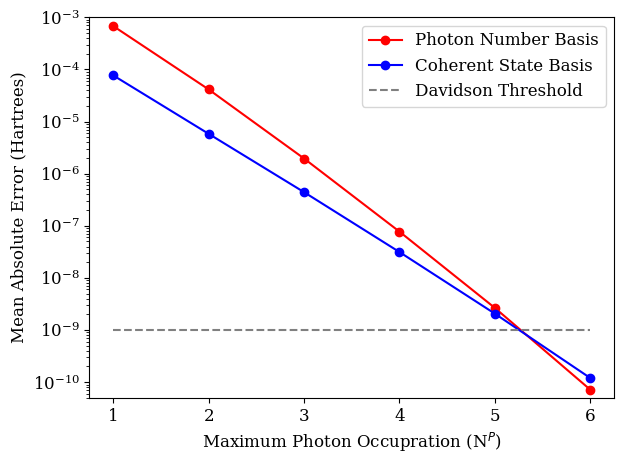

In [15]:
from matplotlib import cm
from matplotlib import rcParams

rcParams['font.family'] = 'serif'
rcParams['font.size'] = 12

davidson_thresh = np.array([1e-9, 1e-9, 1e-9, 1e-9, 1e-9, 1e-9])
plt.plot(numph[:6], np_mae[:6], "r-o", label="Photon Number Basis")
plt.plot(numph[:6], cs_mae[:6], "b-o", label="Coherent State Basis")
plt.plot(numph[:6], davidson_thresh, "grey", linestyle="dashed", label="Davidson Threshold")
plt.yscale("log")
plt.ylim(0.5e-10, 1e-3)
plt.xlabel("Maximum Photon Occupration (N$^P$)")
plt.ylabel("Mean Absolute Error (Hartrees)")
plt.legend()
plt.tight_layout()
plt.savefig("LiH_error_vs_np.png", dpi=150)
plt.show()


In [16]:
# get the minimum value of the ground-state energy along the CO stretch coordinate
E_min = np.min(E_data[:,0])

print(np.allclose(E_data1[:,2],E_data10[:,2] ))
print(np.allclose(E_data2[:,2],E_data10[:,2] ))
print(np.allclose(E_data3[:,2],E_data10[:,2] ))

NameError: name 'E_data' is not defined

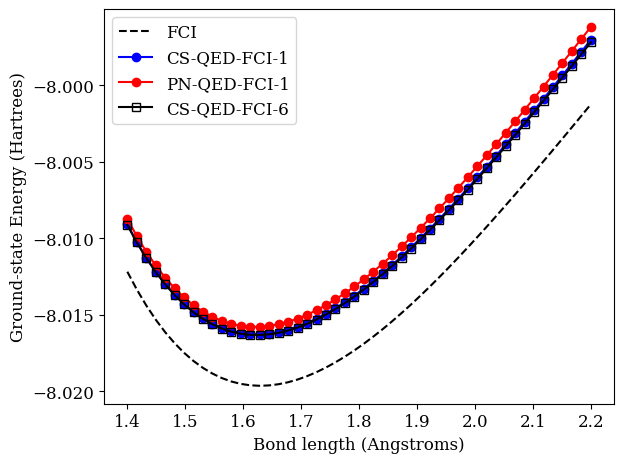

In [18]:

plt.plot(r_data, fci_e0, 'black', linestyle="dashed", label="FCI")
plt.plot(r_data, csE_data1[:,0], 'b-o', label="CS-QED-FCI-1")
plt.plot(r_data, E_data1[:,0], 'r-o', label="PN-QED-FCI-1")
plt.plot(r_data, csE_data6[:,0], 'black', marker="s", ms="6", mfc='none', label="CS-QED-FCI-6")
plt.ylabel("Ground-state Energy (Hartrees)")
plt.xlabel("Bond length (Angstroms)")
plt.legend()
plt.tight_layout()
plt.savefig("LiH_ground_surface.png", dpi=150)
plt.show()


In [19]:
# there is a crossing between the UP state and 5th excited state for the NP=1 data in the CS basis at geometry 43
cs_np1_up = np.copy(csE_data1[:,3])
cs_np1_up[43:] = np.copy(csE_data1[43:,5])

In [20]:
# there is a crossing between the UP state and 5th excited state for the NP=1 data in the CS basis at geometry 43
pn_np1_up = np.copy(E_data1[:,3])
pn_np1_up[25:35] = np.copy(E_data1[25:35,5])
pn_np1_up[35:] = np.copy(E_data1[35:,7])

In [21]:
# find the minimum of the cavity-free ground-state
E_min = np.min(np.array(fci_e0))
print(E_min)

-8.019650240590536


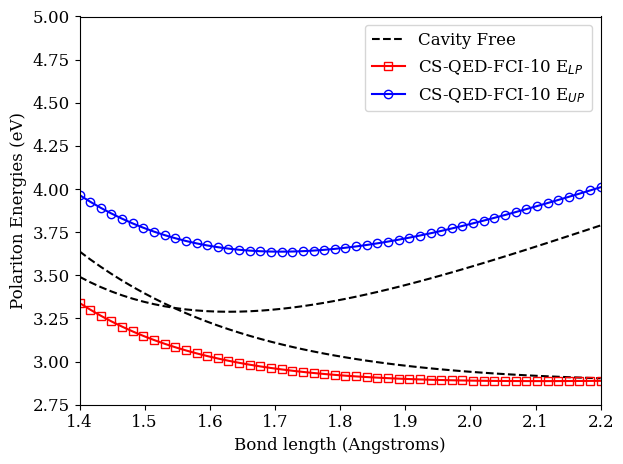

In [22]:
plt.plot(r_data, (np.array(fci_e0)+omega-E_min) * 27.2114, 'black', linestyle="dashed")
plt.plot(r_data, (np.array(fci_e1)-E_min) * 27.2114, 'black', linestyle="dashed", label="Cavity Free")
plt.plot(r_data, (ref_data[:,1]-E_min) * 27.2114, 'red', marker="s", mfc="none", label="CS-QED-FCI-10 E$_{LP}$")
plt.plot(r_data, (ref_data[:,2]-E_min) * 27.2114, 'blue', marker="o", mfc="none", label="CS-QED-FCI-10 E$_{UP}$")
#plt.plot(r_data, (E_data6[:,2]-E_min) * 27.2114,  marker="o")
#plt.plot(r_data, (E_data6[:,3]-E_min) * 27.2114,  marker="o", mfc="none", label="CS-QED-FCI-10 E$_{UP}$")
#plt.plot(r_data, (E_data1[:,1]-E_min) * 27.2114, 'r-o')
#plt.plot(r_data, (E_data1[:,2]-E_min) * 27.2114, 'g-o')
#plt.plot(r_data, (E_data1[:,5]-E_min) * 27.2114, 'r-o')
#plt.plot(r_data, (E_data1[:,7]-E_min) * 27.2114, 'g-o')
#plt.plot(r_data, (pn_np1_up-E_min) * 27.2114, 'r-o', label="Minimal Coherent State Basis")
plt.ylabel("Polariton Energies (eV)")
plt.xlabel("Bond length (Angstroms)")
#plt.ylim(2.25, 4.75)
plt.ylim(2.75, 5.)
plt.xlim(1.4, 2.2)
plt.tight_layout() 
plt.legend()
plt.savefig("LiH_polariton_converged.png", dpi=150)
plt.show()




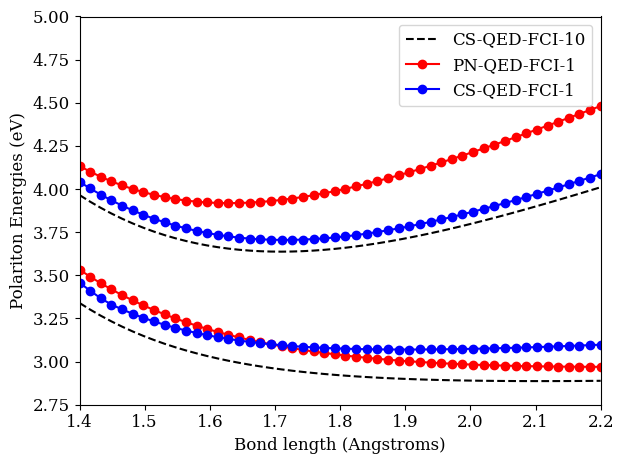

In [23]:
plt.plot(r_data, (ref_data[:,1]-E_min) * 27.2114, 'black', linestyle="dashed", label="CS-QED-FCI-10")
plt.plot(r_data, (ref_data[:,2]-E_min) * 27.2114, 'black', linestyle="dashed")
plt.plot(r_data, (pn_np10_up-E_min) * 27.2114, 'r-o', label="PN-QED-FCI-1")
plt.plot(r_data, (E_data1[:,2]-E_min) * 27.2114, 'r-o')
plt.plot(r_data, (cs_np1_up-E_min) * 27.2114, 'b-o', label="CS-QED-FCI-1")
plt.plot(r_data, (csE_data1[:,2]-E_min) * 27.2114, 'b-o')
plt.ylabel("Polariton Energies (eV)")
plt.xlabel("Bond length (Angstroms)")
plt.ylim(2.75, 5.)
plt.xlim(1.4, 2.2)
plt.tight_layout() 
plt.legend()
plt.savefig("LiH_polariton_cs_vs_pn_v2.png", dpi=150)
plt.show()


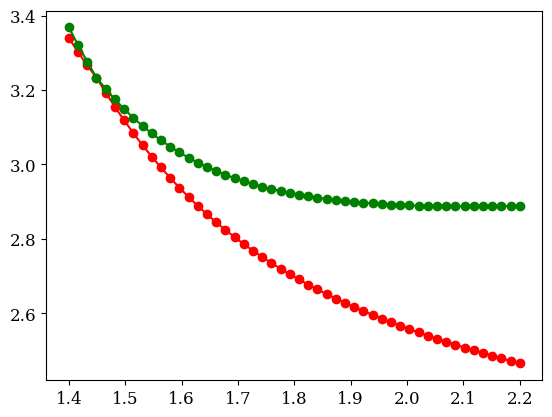

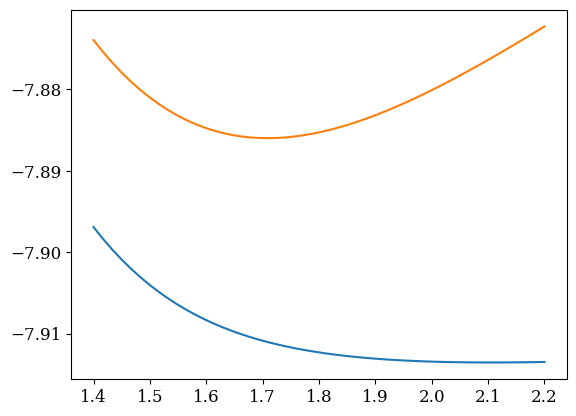

In [33]:
pn_10_lp = np.copy(E_data10[:,1])
pn_10_lp[3:] = np.copy(E_data10[3:,2])
pn_10_up = np.copy(E_data10[:,3])
pn_10_up[45:] = np.copy(E_data10[45:,5])

plt.plot(r_data, (E_data10[:,1]-E_min) * 27.2114, 'r-o')
plt.plot(r_data, (E_data10[:,2]-E_min) * 27.2114, 'g-o')
#plt.plot(r_data, (E_data10[:,3]-E_min) * 27.2114, 'r-o')
#plt.plot(r_data, (E_data10[:,5]-E_min) * 27.2114, 'b-o')
plt.show()
plt.plot(r_data, pn_10_lp)
plt.plot(r_data, pn_10_up)
plt.show()

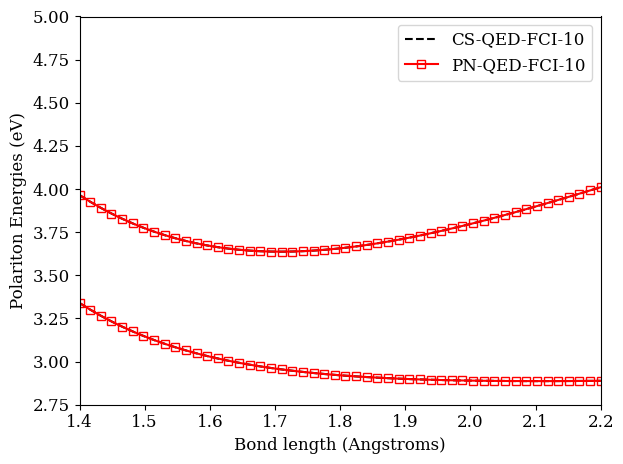

In [37]:
plt.plot(r_data, (ref_data[:,1]-E_min) * 27.2114, 'black', linestyle="dashed", label="CS-QED-FCI-10")
plt.plot(r_data, (ref_data[:,2]-E_min) * 27.2114, 'black', linestyle="dashed")
plt.plot(r_data, (pn_10_lp-E_min) * 27.2114, 'red',  marker="s", ms="6", mfc='none', label="PN-QED-FCI-10")
plt.plot(r_data, (pn_10_up-E_min) * 27.2114, 'red',  marker="s",ms="6", mfc='none' )
#plt.plot(r_data, (pn_10_up-E_min) * 27.2114, 'r-o')
#plt.plot(r_data, (E_data10[:,5]-E_min) * 27.2114, 'r-o')
#plt.plot(r_data, (cs_np1_up-E_min) * 27.2114, 'b-o', label="CS-QED-FCI-1")
#plt.plot(r_data, (csE_data1[:,2]-E_min) * 27.2114, 'b-o')
plt.ylabel("Polariton Energies (eV)")
plt.xlabel("Bond length (Angstroms)")
plt.ylim(2.75, 5.)
plt.xlim(1.4, 2.2)
plt.tight_layout() 
plt.legend()
plt.savefig("LiH_polariton_pn_10.png", dpi=150)
plt.show()


#plt.plot(r_data, np.array(fci_e0)+omega, label='fci gs + omega')
#plt.plot(r_data, fci_e1, label='fci es')
plt.plot(r_data, csE_data1[:,1], label="cs-qed-fci lp")
plt.plot(r_data, csE_data1[:,3], label="cs-qed-fci up")
plt.plot(r_data, E_data1[:,1], label='qed-fci lp')
plt.plot(r_data, E_data1[:,3], label='qed-fci up')
plt.legend()
plt.show()

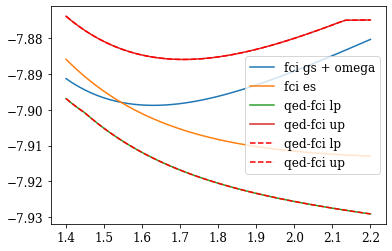

In [29]:
#plt.plot(r_data, E_data1[:,0], label="Eg Np1")
#plt.plot(r_data, fci_e0, label='fci gs')
plt.plot(r_data, np.array(fci_e0)+omega, label='fci gs + omega')
plt.plot(r_data, fci_e1, label='fci es')
#plt.plot(r_data, E_data2[:,0], label='qed-fci gs')
plt.plot(r_data, E_data4[:,1], label='qed-fci lp')
plt.plot(r_data, E_data4[:,3], label='qed-fci up')
plt.plot(r_data, E_data5[:,1], 'r--', label='qed-fci lp')
plt.plot(r_data, E_data5[:,3], 'r--', label='qed-fci up')


plt.legend()
plt.show()

In [ ]:
# plot some excited-state surfaces
#plt.plot(r_data, E_data[:,0], label="E1")
#plt.plot(r_data, E_data[:,1], label="E2")
#plt.plot(r_data, E_data[:,2], label="E3")
plt.plot(r_data, (E_data[:,3]-E_min)*27.211, label="E4")
plt.plot(r_data, (E_data[:,4]-E_min)*27.211, label="E5")
plt.plot(r_data, (E_data[:,5]-E_min)*27.211, label="E6")
plt.plot(r_data, (E_data[:,6]-E_min)*27.211, label="E7")
plt.plot(r_data, (E_data[:,7]-E_min)*27.211, label="E8")
plt.plot(r_data, (E_data[:,8]-E_min)*27.211, label="E9")
plt.plot(r_data, (E_data[:,9]-E_min)*27.211, label="E10")
plt.plot(r_data, (E_data[:,10]-E_min)*27.211, label="E11")
plt.plot(r_data, (E_data[:,11]-E_min)*27.211, label="E12")
plt.ylabel("Energy relative to $E_{min}$ (eV)")
plt.xlabel("CO Bondlength (Angstroms)")
plt.legend()
plt.show()

In [ ]:
# plot the absolute value of the z-component of mu_1j 
# this gives us some hint about how to continue surfaces
plt.plot(r_data, np.abs(Mu_data[:,0,1,2]), label="mu12")
plt.plot(r_data, np.abs(Mu_data[:,0,2,2]), label="mu13")
plt.plot(r_data, np.abs(Mu_data[:,0,3,2]), label="mu14")
plt.plot(r_data, np.abs(Mu_data[:,0,4,2]), label="mu15")
plt.plot(r_data, np.abs(Mu_data[:,0,5,2]), label="mu16")
plt.plot(r_data, np.abs(Mu_data[:,0,6,2]), label="mu17")
plt.legend()
plt.show()